<a href="https://colab.research.google.com/github/Ashvik2008/Project119/blob/MASTER/Project119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import random
import plotly.express as px
import plotly.figure_factory as ff
import statistics
import csv
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [14]:
#Column Name
col_names = ['PassengerId', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Survived']

df = pd.read_csv("titanic.csv", names=col_names).iloc[1:]

print(df.head())

  PassengerId Pclass Gender   Age SibSp Parch Survived
1           1      3      1  34.5     1     0        0
2           2      1      0    47     1     0        1
3           3      3      0    62     0     0        1
4           4      1      0    27     1     0        1
5           5      3      1    22     0     0        0


In [15]:
features = ['PassengerId', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch']
X = df[features]
y = df.Survived

#splitting data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Initialising the Decision Tree Model
clf = DecisionTreeClassifier()

#Fitting the data into the model
clf = clf.fit(X_train,y_train)

#Calculating the accuracy of the model
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

Accuracy: 0.6940298507462687
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Gender &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<PassengerId &le; 176.0<br/>gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 4 ;
5 [label=<PassengerId &le; 362.5<br/>gini = 0.463<br/>samples = 11<br/>value = [4, 7]<br/>class = 1>, fillcolor="#aad5f4"] ;
3 -> 5 ;
6 [label=<PassengerId &le; 294.5<br/>g

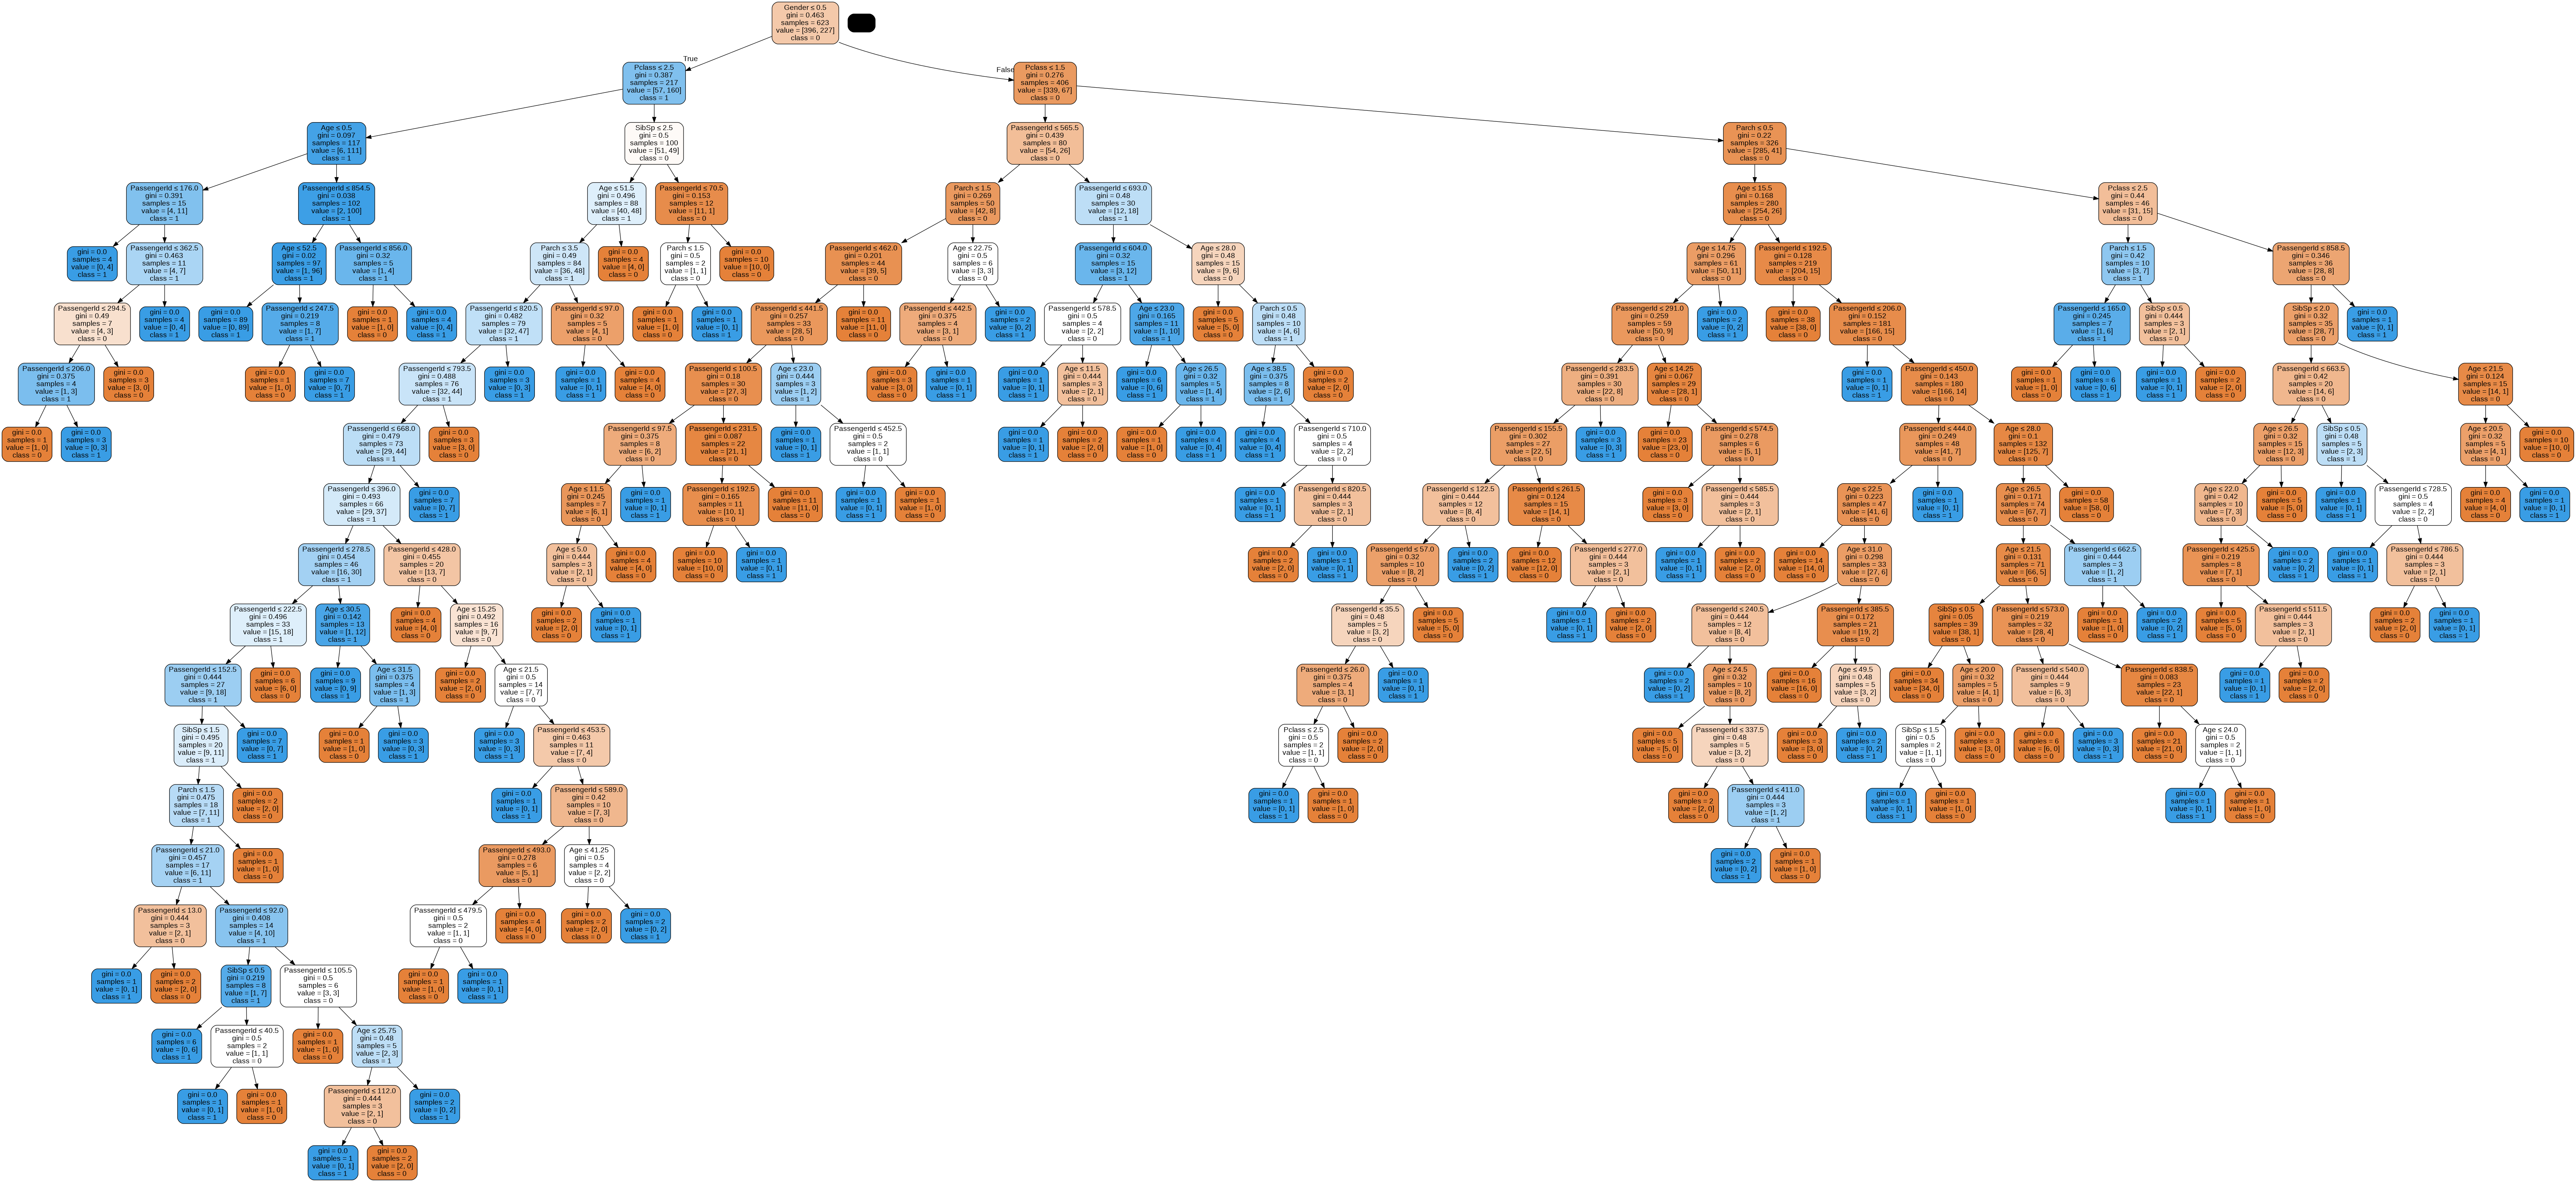

In [16]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

Accuracy: 0.746268656716418


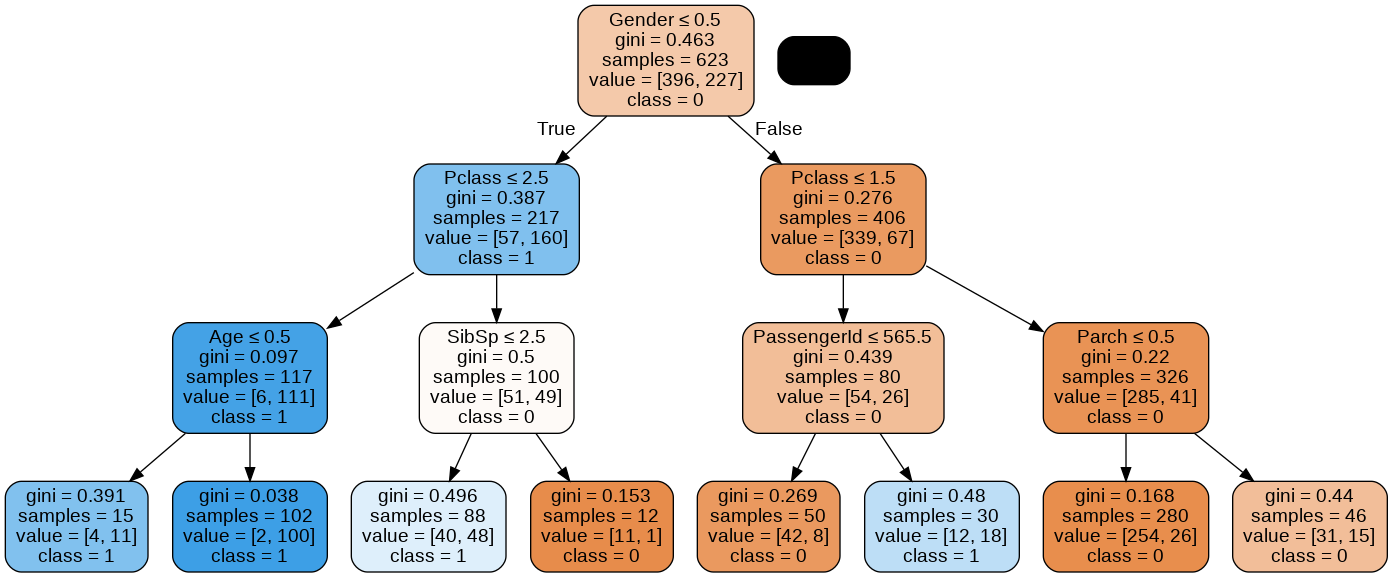

In [17]:
clf = DecisionTreeClassifier(max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO() #Where we will store the data from our decision tree classifier as text.

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic_new.png')
Image(graph.create_png())

# Conclusion

By looking at this chart, we can say with almost that a passenger whose,

*   **Gender** was less than 0.5 and,
*   **PClass** was less than 2.5 and,
*   **SibSp** was less than 2.5

Had Survived